In [259]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

import seaborn as sns
base_skin_dir = os.path.join('.', 'HAM')

In [359]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'}
tile_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
tile_df['path'] = tile_df['image_id'].map(imageid_path_dict.get)
tile_df['cell_type'] = tile_df['dx'].map(lesion_type_dict.get) 
tile_df['cell_type_idx'] = pd.Categorical(tile_df['cell_type']).codes
tile_df[['cell_type_idx', 'cell_type']].sort_values('cell_type_idx').drop_duplicates()

,cell_type_idx,cell_type
9804,0,Actinic keratoses
2528,1,Basal cell carcinoma
1018,2,Benign keratosis-like lesions
1159,3,Dermatofibroma
7050,4,Melanocytic nevi
2370,5,Vascular lesions
1577,6,dermatofibroma


In [360]:
tile_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,None,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,None,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,None,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,None,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,None,Benign keratosis-like lesions,2


In [361]:
data = tile_df

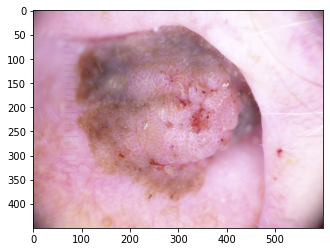

In [263]:
import matplotlib.image as img


for i in range(5):
    imagetot = '.'+tile_df['image_id'][i]+'.jpg'
    plt.imshow(img.imread(imagetot))

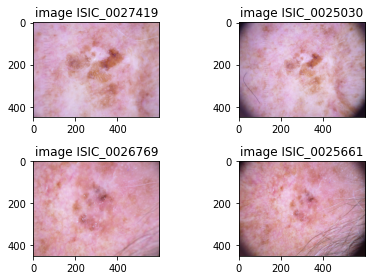

In [264]:
rows = 2
cols = 2
axes=[]
fig=plt.figure()

for i in range(rows*cols):
    imagetot = '.'+tile_df['image_id'][i]+'.jpg'
    axes.append( fig.add_subplot(rows, cols, i+1) )
    subplot_title=("image " +tile_df['image_id'][i])
    axes[-1].set_title(subplot_title)  
    plt.imshow(img.imread(imagetot))
fig.tight_layout()
plt.show()

[2 4 3 6 5 1 0]


(array([ 327.,  514., 1099.,  115., 6705.,  142., 1113.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

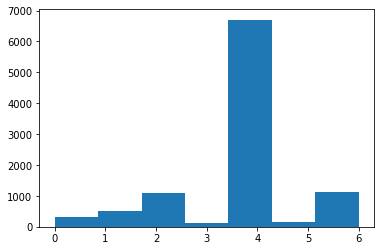

In [265]:
print(data['cell_type_idx'].unique())
plt.hist(data['cell_type_idx'],bins=7)

In [266]:
data.shape

(10015, 11)

In [267]:
df1000img = data.sample(frac=0.2)
df1000img.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,cell_type,cell_type_idx
3099,HAM_0001391,ISIC_0024584,nv,follow_up,45.0,female,back,vidir_molemax,None,Melanocytic nevi,4
2278,HAM_0000022,ISIC_0031377,mel,histo,65.0,male,back,rosendahl,None,dermatofibroma,6
3151,HAM_0005690,ISIC_0025487,nv,follow_up,50.0,female,lower extremity,vidir_molemax,None,Melanocytic nevi,4
7087,HAM_0000262,ISIC_0033380,nv,histo,60.0,male,abdomen,vidir_modern,None,Melanocytic nevi,4
1275,HAM_0006803,ISIC_0024545,mel,histo,60.0,female,abdomen,vidir_modern,None,dermatofibroma,6


In [268]:
df1000img.shape

(2003, 11)

(array([  57.,  105.,  211.,   24., 1354.,   32.,  220.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

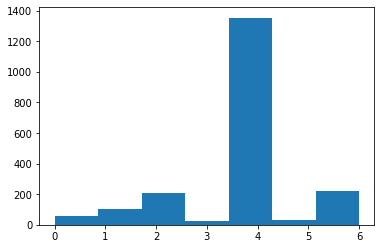

In [269]:
plt.hist(df1000img['cell_type_idx'],bins=7)

In [271]:
df1000img['image'] = '.'+df1000img['image_id']+'.jpg'

In [272]:
df1000imgdf = pd.DataFrame(df1000img)
df1000imgdf.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,path,cell_type,cell_type_idx,image
3099,HAM_0001391,ISIC_0024584,nv,follow_up,45.0,female,back,vidir_molemax,None,Melanocytic nevi,4,C://Users//Mi//Documents//Projets Python//Kagg...
2278,HAM_0000022,ISIC_0031377,mel,histo,65.0,male,back,rosendahl,None,dermatofibroma,6,C://Users//Mi//Documents//Projets Python//Kagg...
3151,HAM_0005690,ISIC_0025487,nv,follow_up,50.0,female,lower extremity,vidir_molemax,None,Melanocytic nevi,4,C://Users//Mi//Documents//Projets Python//Kagg...
7087,HAM_0000262,ISIC_0033380,nv,histo,60.0,male,abdomen,vidir_modern,None,Melanocytic nevi,4,C://Users//Mi//Documents//Projets Python//Kagg...
1275,HAM_0006803,ISIC_0024545,mel,histo,60.0,female,abdomen,vidir_modern,None,dermatofibroma,6,C://Users//Mi//Documents//Projets Python//Kagg...


In [275]:
images1000 = []
for i in range(df1000img.shape[0]):
    images1000.append(img.imread('.'+df1000img['image_id'].iloc[i]+'.jpg'))

In [276]:
images1000[0].shape

(450, 600, 3)

In [278]:
x_train = images1000

In [300]:
trainee = np.array(x_train)

In [283]:
y_train = df1000img['cell_type_idx']

In [284]:
from tensorflow.keras.utils import to_categorical
y_traint = to_categorical(np.array(y_train),num_classes=7)

In [306]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = trainee[0].shape))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Flatten())
# model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='softmax'))


model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [307]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 448, 598, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 149, 199, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 147, 197, 32)      9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 49, 65, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 101920)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 7)                 713447    
Total params: 723,591
Trainable params: 723,591
Non-trainable params: 0
_______________________________________________

In [308]:
model.fit(trainee,y_traint,epochs=15,verbose = 1,validation_split=0.1)

Epoch 1/15
57/57 [==============================] - 115s 2s/step - loss: 137.8938 - accuracy: 0.5067 - val_loss: 1.4968 - val_accuracy: 0.6468
Epoch 2/15
57/57 [==============================] - 114s 2s/step - loss: 1.8701 - accuracy: 0.6398 - val_loss: 1.6193 - val_accuracy: 0.5124
Epoch 3/15
57/57 [==============================] - 116s 2s/step - loss: 3.5227 - accuracy: 0.6509 - val_loss: 1.6535 - val_accuracy: 0.6318
Epoch 4/15
57/57 [==============================] - 115s 2s/step - loss: 6.7662 - accuracy: 0.6931 - val_loss: 1.6766 - val_accuracy: 0.6020
Epoch 5/15
57/57 [==============================] - 114s 2s/step - loss: 10.4258 - accuracy: 0.7059 - val_loss: 1.6691 - val_accuracy: 0.6219
Epoch 6/15
57/57 [==============================] - 115s 2s/step - loss: 3.0872 - accuracy: 0.7642 - val_loss: 3.8333 - val_accuracy: 0.6667
Epoch 7/15
57/57 [==============================] - 114s 2s/step - loss: 6.5322 - accuracy: 0.7592 - val_loss: 3.1699 - val_accuracy: 0.6418
Epoch 8/15

In [320]:
y_true = y_train
y_predic = np.argmax(np.array(model.predict(trainee)), axis=-1)
y_predic

array([4, 6, 4, ..., 4, 4, 2], dtype=int64)

In [321]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_predic)

array([[  40,    1,    3,    0,   11,    0,    2],
       [   1,   66,    2,    0,   31,    1,    4],
       [   1,    3,  144,    0,   59,    0,    4],
       [   0,    0,    4,   14,    6,    0,    0],
       [   0,   11,   18,    0, 1301,    0,   24],
       [   0,    0,    1,    0,    9,   22,    0],
       [   1,    0,    1,    0,   20,    0,  198]], dtype=int64)

In [324]:
###partie test:
dftest = data.sample(frac=0.05)
dftest['image'] = '.'+dftest['image_id']+'.jpg'
imagestest = []
for i in range(dftest.shape[0]):
    imagestest.append(img.imread('.'+dftest['image_id'].iloc[i]+'.jpg'))

In [330]:
from tensorflow.keras.utils import to_categorical
y_traint = to_categorical(np.array(y_train),num_classes=7)
y_testt = np.array(dftest['cell_type_idx'])

In [327]:
prediction = np.argmax(np.array(model.predict(np.array(imagestest))), axis=-1)

In [329]:
prediction

array([2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 1, 4, 2, 4, 4, 4, 0, 4, 4,
       2, 1, 6, 4, 6, 4, 4, 4, 4, 2, 4, 4, 2, 1, 4, 4, 4, 2, 2, 4, 6, 4,
       4, 6, 1, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 6,
       4, 4, 4, 4, 2, 1, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 6, 4,
       4, 1, 4, 6, 4, 2, 6, 4, 4, 4, 4, 4, 4, 6, 2, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 4, 6, 6, 4, 4, 6, 4, 1, 6, 4, 6, 4, 4, 4, 4, 4,
       4, 1, 2, 4, 4, 2, 1, 4, 4, 4, 4, 6, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       6, 2, 1, 4, 4, 4, 2, 2, 2, 4, 4, 6, 4, 4, 4, 1, 4, 6, 4, 4, 6, 4,
       6, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 6,
       4, 4, 4, 6, 6, 6, 4, 4, 4, 1, 2, 4, 4, 4, 1, 4, 4, 4, 2, 2, 2, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 4, 2, 4, 4, 1, 4, 6, 4, 4, 2, 2, 6, 6, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 4, 4, 2, 4, 4, 1, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 6, 4, 4, 4,

In [331]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_testt, prediction)

array([[  1,   3,   2,   0,   8,   0,   0],
       [  0,   8,   4,   0,   7,   0,   4],
       [  0,   5,  13,   0,  35,   0,   4],
       [  0,   0,   2,   0,   4,   0,   0],
       [  1,   8,  20,   0, 287,   1,  26],
       [  0,   0,   0,   0,   4,   1,   0],
       [  0,   4,   7,   0,  25,   0,  17]], dtype=int64)

In [332]:
from sklearn.metrics import accuracy_score
accuracy_score(y_testt, prediction)

0.6526946107784432

In [363]:
#on a trop de valeur 4:
df2=data

In [365]:
df2.drop(df2.index[df2['cell_type_idx'] == 4], inplace = True)

(array([ 327.,  514., 1099.,  115.,    0.,  142., 1113.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

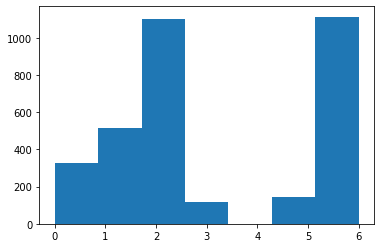

In [368]:
plt.hist(df2['cell_type_idx'],bins=7)

In [370]:
df3 = df2.sample(frac=0.80)
df3['image'] = '.'+df3['image_id']+'.jpg'
images3 = []
for i in range(df3.shape[0]):
    images3.append(img.imread('.'+df3['image_id'].iloc[i]+'.jpg'))

In [371]:
from tensorflow.keras.utils import to_categorical
y_train = df3['cell_type_idx']
y_train2 = to_categorical(np.array(y_train),num_classes=7)
y_test2 = np.array(df3['cell_type_idx'])

In [372]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model2 = Sequential()
model2.add(Conv2D(32,(3,3), activation = 'relu', input_shape = images3[0].shape))
model2.add(MaxPooling2D(pool_size = (3,3)))
model2.add(Conv2D(32,(3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (3,3)))
model2.add(Flatten())
# model2.add(Dense(10, activation='relu'))
model2.add(Dense(7, activation='softmax'))


model2.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [374]:
model2.fit(np.array(images3),y_train2,epochs=15,verbose = 1,validation_split=0.1)

Epoch 1/15
75/75 [==============================] - 278s 4s/step - loss: 3.4898 - accuracy: 0.2753 - val_loss: 1.7869 - val_accuracy: 0.2264
Epoch 2/15
75/75 [==============================] - 240s 3s/step - loss: 3.0620 - accuracy: 0.3059 - val_loss: 1.7984 - val_accuracy: 0.2000
Epoch 3/15
75/75 [==============================] - 229s 3s/step - loss: 29.6827 - accuracy: 0.4222 - val_loss: 2.9337 - val_accuracy: 0.4075
Epoch 4/15
75/75 [==============================] - 229s 3s/step - loss: 6.2847 - accuracy: 0.5220 - val_loss: 3.1156 - val_accuracy: 0.4113
Epoch 5/15
75/75 [==============================] - 229s 3s/step - loss: 5.8448 - accuracy: 0.5707 - val_loss: 3.0553 - val_accuracy: 0.4491
Epoch 6/15
75/75 [==============================] - 229s 3s/step - loss: 2.4464 - accuracy: 0.6601 - val_loss: 11.1910 - val_accuracy: 0.3396
Epoch 7/15
75/75 [==============================] - 229s 3s/step - loss: 1.9127 - accuracy: 0.6857 - val_loss: 3.8352 - val_accuracy: 0.4604
Epoch 8/15


In [375]:
predictions = np.argmax(np.array(model.predict(np.array(images3))), axis=-1)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2, predictions)     #c'est assez bien

array([[215,   8,  39,   0,   0,  10],
       [ 11, 293,  82,   0,   1,  27],
       [ 21,  23, 798,   4,   1,  57],
       [  4,   6,  35,  39,   1,   5],
       [  1,   4,  32,   0,  56,   7],
       [  4,   9,  58,   0,   0, 797]], dtype=int64)